<a href="https://colab.research.google.com/github/sandeepsai15634/Effectiveness-of-hyper-tuned-deep-learning-techniques-for-maize-disease-detection/blob/main/Copy_of_CNN_and_effientnetMAIZE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = (256,256)
BATCH_SIZE = 32

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "//content/drive/MyDrive/maize",
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 4188 files belonging to 4 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [ ]:
len(dataset)

131

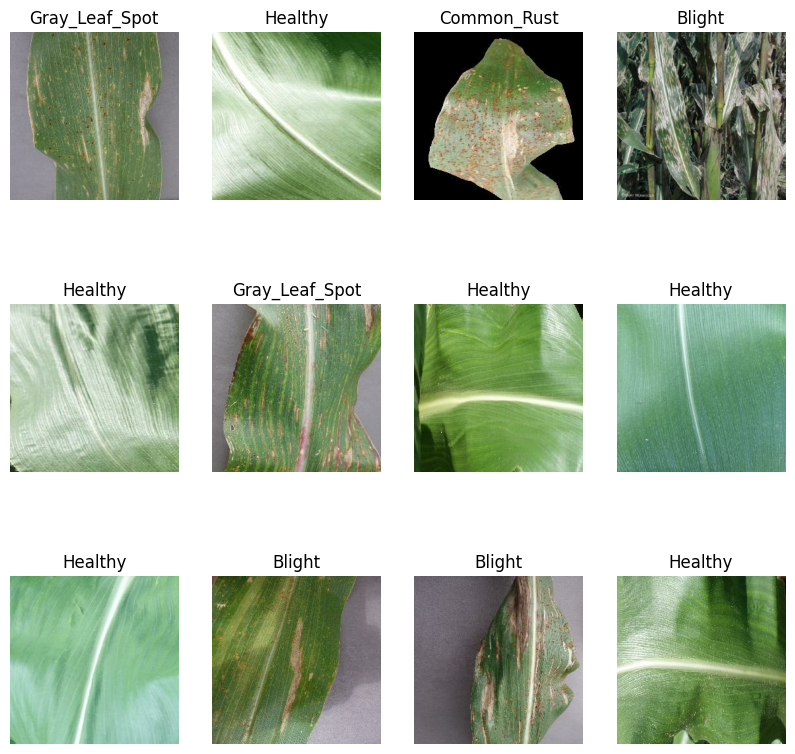

In [ ]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [ ]:
def get_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=8)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds = get_dataset(dataset)

In [ ]:
print("Length of Training Dataset is",len(train_ds))
print("\nLength of Validation Dataset is",len(val_ds))
print("\nLength of Testing Dataset is",len(test_ds))

Length of Training Dataset is 104

Length of Validation Dataset is 13

Length of Testing Dataset is 14


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1.0 / 255)
])


In [ ]:
n_classes = 4
input_shape = (BATCH_SIZE,256,256,3)
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(3,3),activation ='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),

])
model.build(input_shape=input_shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 4)                     │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [ ]:
history = model.fit(
train_ds,
epochs=16,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds)

Epoch 1/16
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.9288 - loss: 0.1911 - val_accuracy: 0.9183 - val_loss: 0.2032
Epoch 2/16
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9277 - loss: 0.1718 - val_accuracy: 0.9351 - val_loss: 0.1746
Epoch 3/16
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9434 - loss: 0.1620 - val_accuracy: 0.9399 - val_loss: 0.1659
Epoch 4/16
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.9577 - loss: 0.1159 - val_accuracy: 0.9495 - val_loss: 0.1443
Epoch 5/16
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9307 - loss: 0.1704 - val_accuracy: 0.9591 - val_loss: 0.1430
Epoch 6/16
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.9553 - loss: 0.1290 - val_accuracy: 0.9543 - val_loss: 0.1373
Epoch 7/16
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9565 - loss: 0.1049 - val_accuracy: 0.9591 - val_loss: 0.1213
Epoch 8/16
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9636 - loss: 0.1169 - val_ac

In [ ]:
scores = model.evaluate(test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9533 - loss: 0.1118


In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

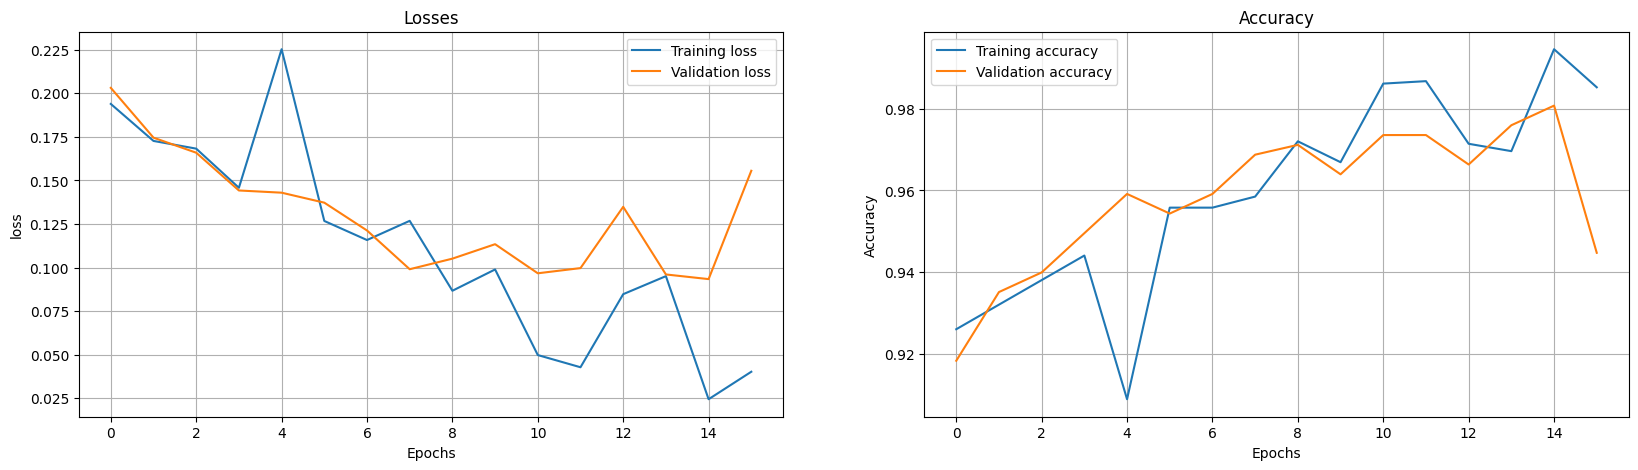

In [ ]:
his_data = pd.DataFrame(history.history)
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(his_data.loss, label="Training loss")
plt.plot(his_data.val_loss, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Losses")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(his_data.accuracy, label="Training accuracy")
plt.plot(his_data.val_accuracy, label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.grid()
plt.legend()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get the true labels and predicted labels
y_true = []
y_pred = []

for images_batch, labels_batch in test_ds:
    predictions = model.predict(images_batch)
    y_true.extend(labels_batch.numpy())  # Actual labels
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted labels

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


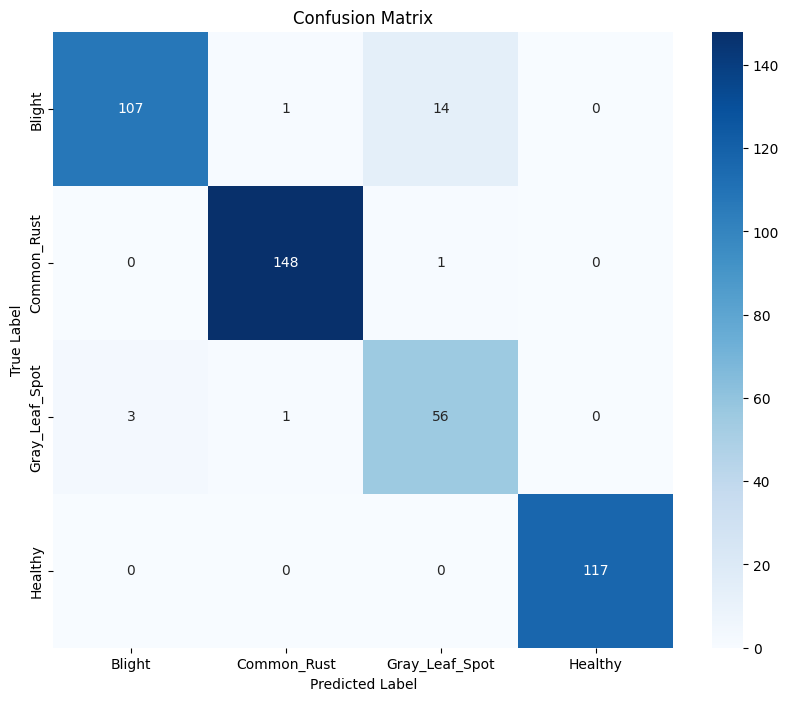

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Print classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)


Classification Report:
                 precision    recall  f1-score   support

        Blight       0.97      0.88      0.92       122
   Common_Rust       0.99      0.99      0.99       149
Gray_Leaf_Spot       0.79      0.93      0.85        60
       Healthy       1.00      1.00      1.00       117

      accuracy                           0.96       448
     macro avg       0.94      0.95      0.94       448
  weighted avg       0.96      0.96      0.96       448



First Image to Predict :

Actual label: Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step

Predicted label Blight


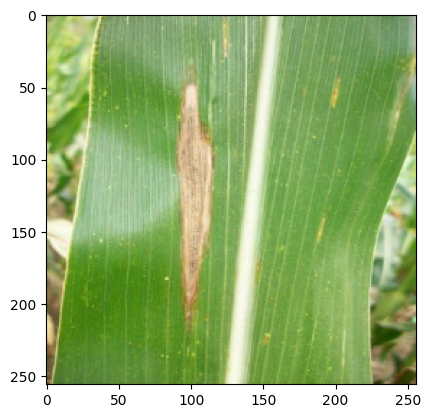

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("First Image to Predict :")
    plt.imshow(first_image)
    print("\nActual label:",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("\nPredicted label" ,class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict (img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
#     confidence = round(np.max(predictions[0]),2)
    confidence = round(100*(np.max(predictions[0])),2)

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


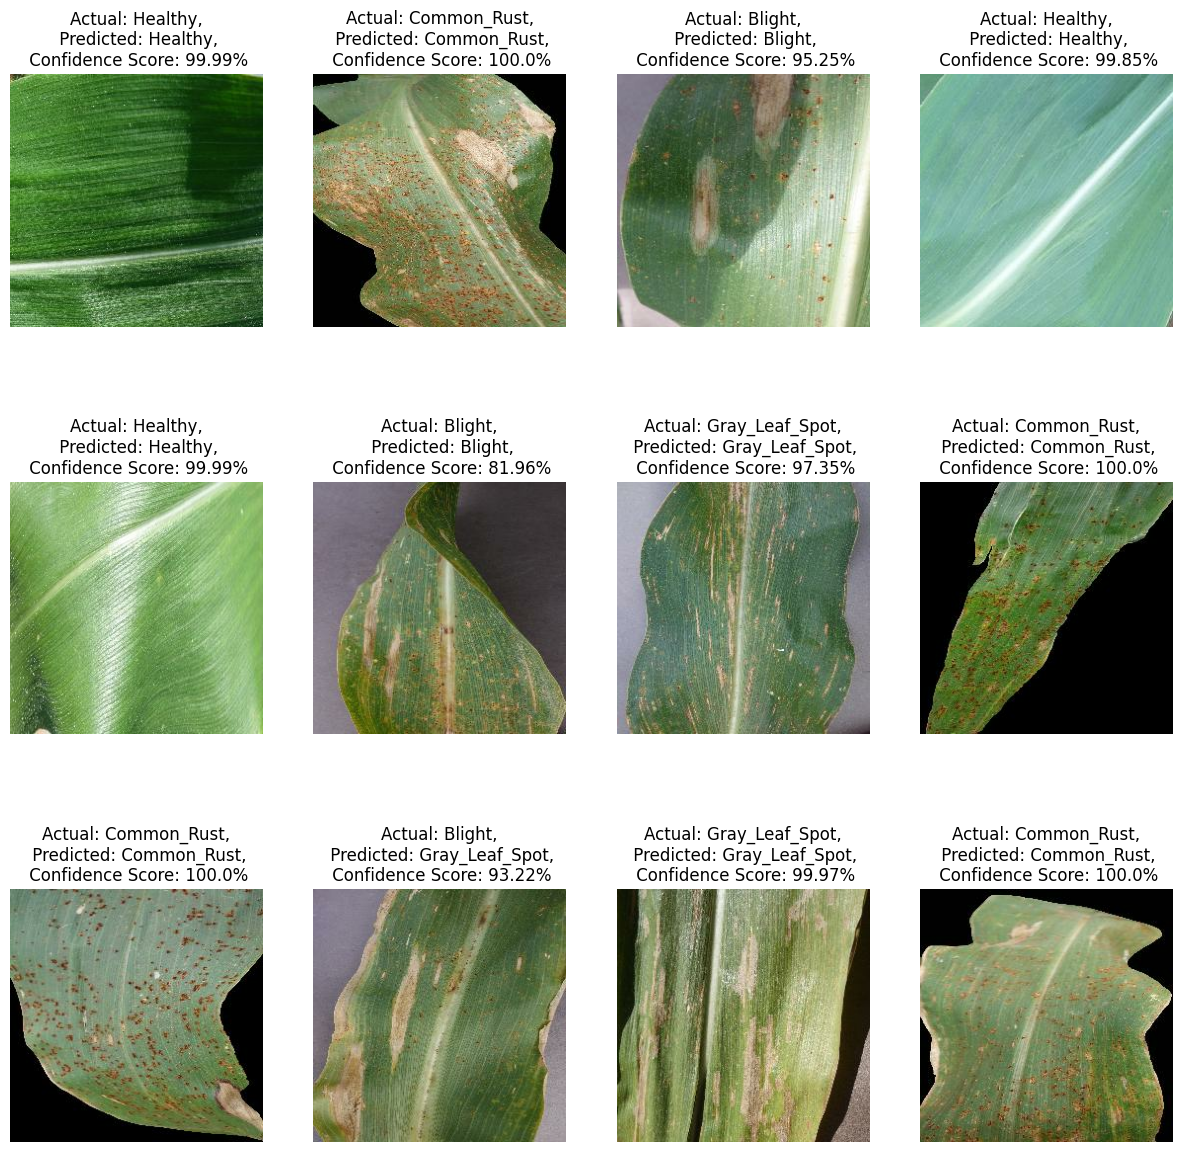

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class , confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence Score: {confidence}%")
        plt.axis("off")

In [ ]:
EFFICENT NET

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
# Set constants
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32

In [ ]:
# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/maize",
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

class_names = dataset.class_names
print("Class Names:", class_names)
print("Number of Classes:", len(class_names))

Found 4188 files belonging to 4 classes.
Class Names: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
Number of Classes: 4


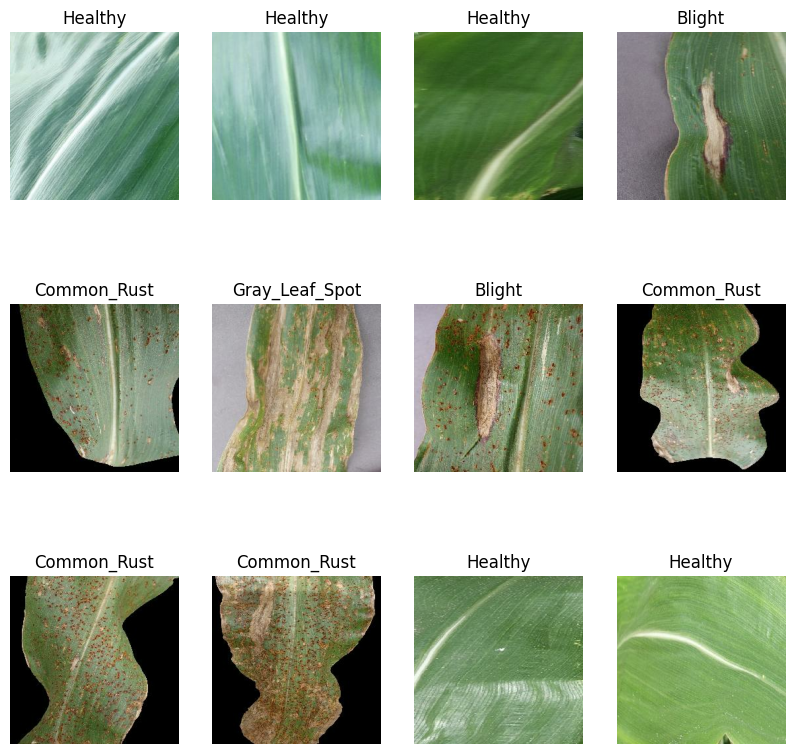

In [ ]:
# Visualize some samples
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [ ]:
# Function to split the dataset
def get_dataset(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=8)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
# Split the dataset
train_ds, val_ds, test_ds = get_dataset(dataset)
print("Length of Training Dataset:", len(train_ds))
print("Length of Validation Dataset:", len(val_ds))
print("Length of Testing Dataset:", len(test_ds))

Length of Training Dataset: 104
Length of Validation Dataset: 13
Length of Testing Dataset: 14


In [ ]:
# Prefetch the datasets for performance
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

# Build the EfficientNet model
n_classes = len(class_names)
base_model = EfficientNetB0(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
                             include_top=False,
                             weights='imagenet')


In [ ]:
# Freeze the base model
base_model.trainable = False

# Create the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [ ]:
model.summary

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
# Train the model
history = model.fit(
    train_ds,
    epochs=16,  # Adjust as necessary
    batch_size=BATCH_SIZE,
    validation_data=val_ds
)

Epoch 1/16
104/104 ━━━━━━━━━━━━━━━━━━━━ 83s 409ms/step - accuracy: 0.7916 - loss: 0.5228 - val_accuracy: 0.9375 - val_loss: 0.1573
Epoch 2/16
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9379 - loss: 0.1748 - val_accuracy: 0.9639 - val_loss: 0.1198
Epoch 3/16
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9457 - loss: 0.1432 - val_accuracy: 0.9663 - val_loss: 0.0879
Epoch 4/16
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9648 - loss: 0.1092 - val_accuracy: 0.9736 - val_loss: 0.0878
Epoch 5/16
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9707 - loss: 0.0927 - val_accuracy: 0.9856 - val_loss: 0.0665
Epoch 6/16
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9747 - loss: 0.0814 - val_accuracy: 0.9808 - val_loss: 0.0558
Epoch 7/16
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.9747 - loss: 0.0703 - val_accuracy: 0.9663 - val_loss: 0.0662
Epoch 8/16
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9791 - loss: 0.0614 - val_ac

In [ ]:
# Evaluate the model
scores = model.evaluate(test_ds)
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.9964 - loss: 0.0139
Test Loss: 0.01570156216621399
Test Accuracy: 0.9955357313156128


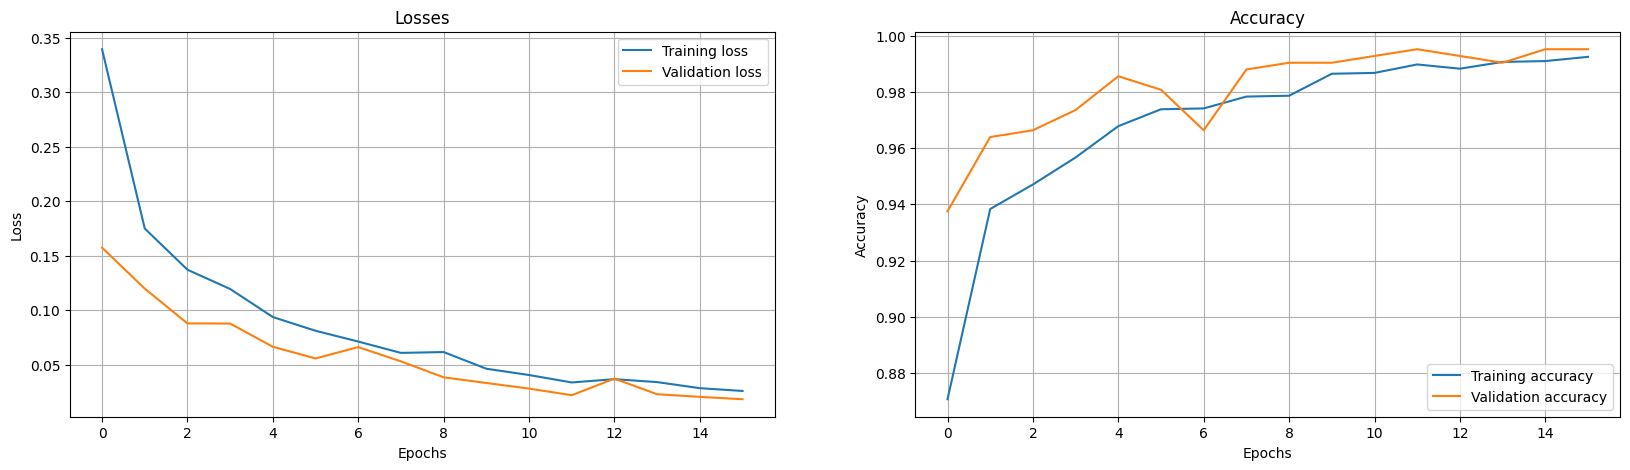

In [ ]:
# Plot training history
his_data = pd.DataFrame(history.history)
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(his_data.loss, label="Training loss")
plt.plot(his_data.val_loss, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Losses")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(his_data.accuracy, label="Training accuracy")
plt.plot(his_data.val_accuracy, label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.grid()
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


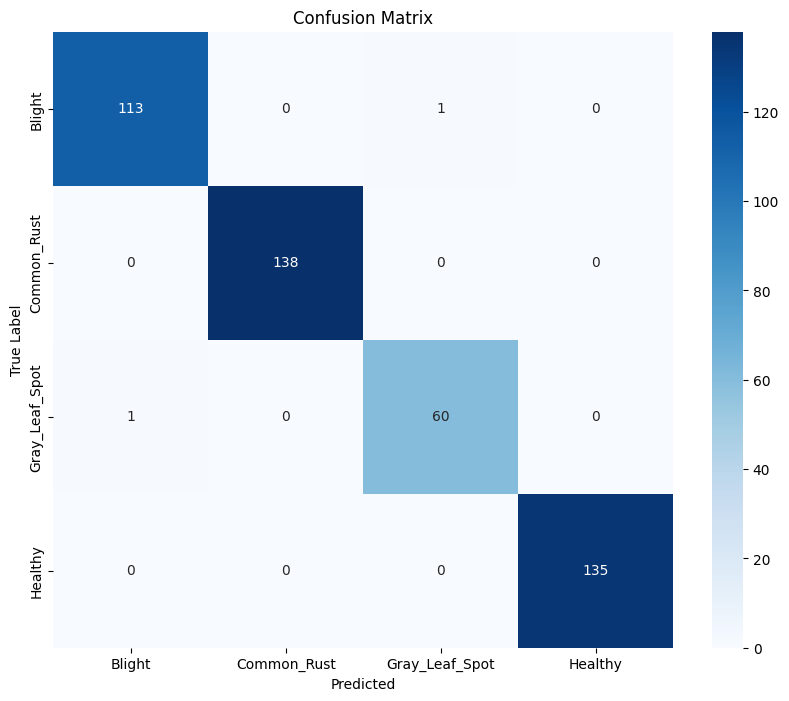

                precision    recall  f1-score   support

        Blight       0.99      0.99      0.99       114
   Common_Rust       1.00      1.00      1.00       138
Gray_Leaf_Spot       0.98      0.98      0.98        61
       Healthy       1.00      1.00      1.00       135

      accuracy                           1.00       448
     macro avg       0.99      0.99      0.99       448
  weighted avg       1.00      1.00      1.00       448



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Step 1: Make predictions on the test dataset
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Step 2: Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 4: Print the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


In [ ]:
# Prediction function
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


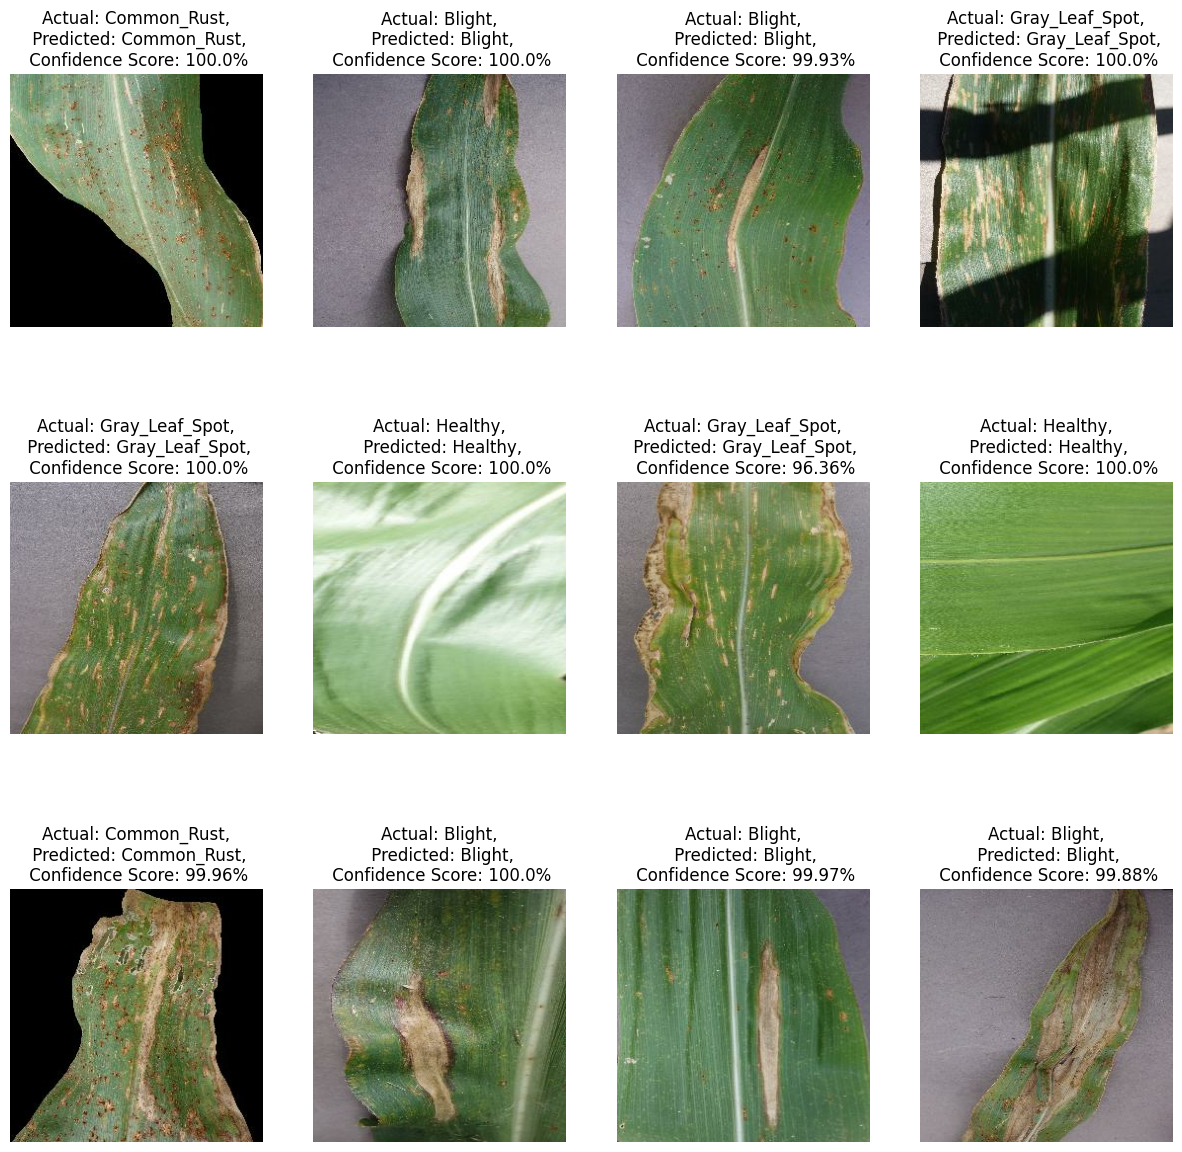

In [ ]:
# Visualize predictions
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence Score: {confidence}%")
        plt.axis("off")

HYPERPARAMETER TUNING

In [ ]:
# Train the model
history = model.fit(
    train_ds,
    epochs=10,  # Adjust as necessary
    batch_size=BATCH_SIZE,
    validation_data=val_ds
)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9906 - loss: 0.0253 - val_accuracy: 0.9928 - val_loss: 0.0182
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9962 - loss: 0.0215 - val_accuracy: 0.9952 - val_loss: 0.0163
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9973 - loss: 0.0148 - val_accuracy: 0.9952 - val_loss: 0.0193
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9957 - loss: 0.0169 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9975 - loss: 0.0113 - val_accuracy: 0.9976 - val_loss: 0.0109
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9955 - loss: 0.0158 - val_accuracy: 0.9952 - val_loss: 0.0167
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9915 - loss: 0.0238 - val_accuracy: 0.9952 - val_loss: 0.0094
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9956 - loss: 0.0150 - val_accu

In [ ]:
# Evaluate the model
scores = model.evaluate(test_ds)
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9812 - loss: 0.0314
Test Loss: 0.035302359610795975
Test Accuracy: 0.9821428656578064


In [ ]:
# Train the model
history = model.fit(
    train_ds,
    epochs=8,  # Adjust as necessary
    batch_size=BATCH_SIZE,
    validation_data=val_ds
)

Epoch 1/8
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9972 - loss: 0.0132 - val_accuracy: 0.9976 - val_loss: 0.0109
Epoch 2/8
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9940 - loss: 0.0167 - val_accuracy: 0.9952 - val_loss: 0.0154
Epoch 3/8
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9976 - loss: 0.0079 - val_accuracy: 0.9928 - val_loss: 0.0128
Epoch 4/8
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9975 - loss: 0.0091 - val_accuracy: 0.9976 - val_loss: 0.0132
Epoch 5/8
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9962 - loss: 0.0155 - val_accuracy: 0.9928 - val_loss: 0.0190
Epoch 6/8
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9959 - loss: 0.0138 - val_accuracy: 0.9976 - val_loss: 0.0100
Epoch 7/8
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9981 - loss: 0.0084 - val_accuracy: 1.0000 - val_loss: 0.0066
Epoch 8/8
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9962 - loss: 0.0121 - val_accuracy: 0.

In [ ]:
# Evaluate the model
scores = model.evaluate(test_ds)
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9960 - loss: 0.0162
Test Loss: 0.017968405038118362
Test Accuracy: 0.9955357313156128


In [ ]:
# Train the model
history = model.fit(
    train_ds,
    epochs=6,  # Adjust as necessary
    batch_size=BATCH_SIZE,
    validation_data=val_ds
)

Epoch 1/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9947 - loss: 0.0150 - val_accuracy: 0.9976 - val_loss: 0.0082
Epoch 2/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9954 - loss: 0.0148 - val_accuracy: 0.9976 - val_loss: 0.0174
Epoch 3/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9958 - loss: 0.0181 - val_accuracy: 0.9952 - val_loss: 0.0187
Epoch 4/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9961 - loss: 0.0149 - val_accuracy: 0.9976 - val_loss: 0.0150
Epoch 5/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9990 - loss: 0.0075 - val_accuracy: 0.9952 - val_loss: 0.0098
Epoch 6/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9969 - loss: 0.0073 - val_accuracy: 0.9952 - val_loss: 0.0117


In [ ]:
# Evaluate the model
scores = model.evaluate(test_ds)
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9991 - loss: 0.0068
Test Loss: 0.017372678965330124
Test Accuracy: 0.9955357313156128


In [ ]:
# Train the model
history = model.fit(
    train_ds,
    epochs=4,  # Adjust as necessary
    batch_size=BATCH_SIZE,
    validation_data=val_ds
)

Epoch 1/4
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9961 - loss: 0.0108 - val_accuracy: 0.9952 - val_loss: 0.0151
Epoch 2/4
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9974 - loss: 0.0096 - val_accuracy: 0.9976 - val_loss: 0.0159
Epoch 3/4
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9953 - loss: 0.0139 - val_accuracy: 0.9928 - val_loss: 0.0278
Epoch 4/4
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9975 - loss: 0.0081 - val_accuracy: 0.9928 - val_loss: 0.0234


In [ ]:
# Evaluate the model
scores = model.evaluate(test_ds)
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9992 - loss: 0.0051
Test Loss: 0.016353728249669075
Test Accuracy: 0.9955357313156128


In [ ]:
# Set constants
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 64

In [ ]:
# Train the model
history = model.fit(
    train_ds,
    epochs=6,  # Adjust as necessary
    batch_size=BATCH_SIZE,
    validation_data=val_ds
)

Epoch 1/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9952 - loss: 0.0143 - val_accuracy: 0.9663 - val_loss: 0.1904
Epoch 2/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9924 - loss: 0.0243 - val_accuracy: 0.9688 - val_loss: 0.1786
Epoch 3/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9983 - loss: 0.0061 - val_accuracy: 0.9639 - val_loss: 0.2294
Epoch 4/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9964 - loss: 0.0105 - val_accuracy: 0.9519 - val_loss: 0.2019
Epoch 5/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9939 - loss: 0.0135 - val_accuracy: 0.9567 - val_loss: 0.2179
Epoch 6/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9956 - loss: 0.0134 - val_accuracy: 0.9639 - val_loss: 0.1663


In [ ]:
# Evaluate the model
scores = model.evaluate(test_ds)
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9337 - loss: 0.3514
Test Loss: 0.28302595019340515
Test Accuracy: 0.9369369149208069


In [ ]:
NEW MODEL BATCH SIZE 64

In [ ]:
# Set constants
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 64

In [ ]:
# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/maize",
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

class_names = dataset.class_names
print("Class Names:", class_names)
print("Number of Classes:", len(class_names))

Found 4188 files belonging to 4 classes.
Class Names: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
Number of Classes: 4


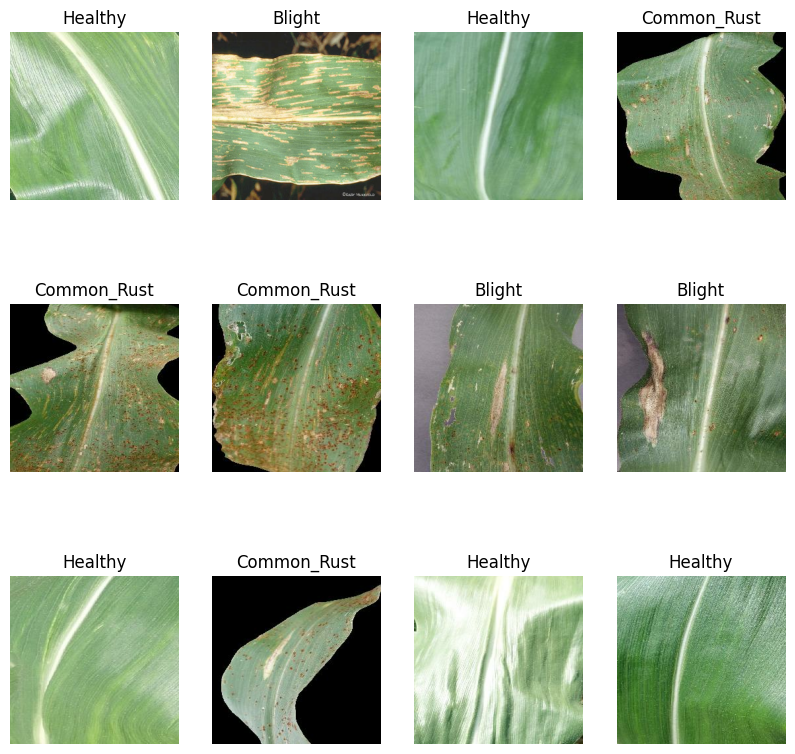

In [ ]:
# Visualize some samples
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [ ]:
# Function to split the dataset
def get_dataset(ds, train_split=0.6, val_split=0.2, test_split=0.2, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=8)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
# Split the dataset
train_ds, val_ds, test_ds = get_dataset(dataset)
print("Length of Training Dataset:", len(train_ds))
print("Length of Validation Dataset:", len(val_ds))
print("Length of Testing Dataset:", len(test_ds))

Length of Training Dataset: 39
Length of Validation Dataset: 13
Length of Testing Dataset: 14


In [ ]:
# Prefetch the datasets for performance
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

# Build the EfficientNet model
n_classes = len(class_names)
base_model = EfficientNetB0(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
                             include_top=False,
                             weights='imagenet')


In [ ]:
# Freeze the base model
base_model.trainable = False

# Create the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    train_ds,
    epochs=6,  # Adjust as necessary
    batch_size=BATCH_SIZE,
    validation_data=val_ds
)

Epoch 1/6
39/39 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.7308 - loss: 0.6817 - val_accuracy: 0.9026 - val_loss: 0.2368
Epoch 2/6
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.9074 - loss: 0.2283 - val_accuracy: 0.9339 - val_loss: 0.1697
Epoch 3/6
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.9411 - loss: 0.1584 - val_accuracy: 0.9375 - val_loss: 0.1625
Epoch 4/6
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9531 - loss: 0.1400 - val_accuracy: 0.9519 - val_loss: 0.1377
Epoch 5/6
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9592 - loss: 0.1099 - val_accuracy: 0.9531 - val_loss: 0.1211
Epoch 6/6
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9684 - loss: 0.1007 - val_accuracy: 0.9603 - val_loss: 0.1178


In [ ]:
# Evaluate the model
scores = model.evaluate(test_ds)
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

In [ ]:
DATA SPLITTING RATIO

In [ ]:
# Function to split the dataset
def get_dataset(ds, train_split=0.5, val_split=0.4, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=8)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
# Split the dataset
train_ds, val_ds, test_ds = get_dataset(dataset)
print("Length of Training Dataset:", len(train_ds))
print("Length of Validation Dataset:", len(val_ds))
print("Length of Testing Dataset:", len(test_ds))

Length of Training Dataset: 33
Length of Validation Dataset: 26
Length of Testing Dataset: 7


In [ ]:
# Prefetch the datasets for performance
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

# Build the EfficientNet model
n_classes = len(class_names)
base_model = EfficientNetB0(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
                             include_top=False,
                             weights='imagenet')

In [ ]:
# Freeze the base model
base_model.trainable = False

# Create the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    train_ds,
    epochs=6,  # Adjust as necessary
    batch_size=BATCH_SIZE,
    validation_data=val_ds
)

NameError: name 'model' is not defined

In [ ]:
# Evaluate the model
scores = model.evaluate(test_ds)
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])